In [1]:
# Importation des bibliothéque necessaire à notre projet
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV



In [2]:
# Chargement des données
data = pd.read_csv('heart.csv') #Lecture du dataset

# Exploration des données de notre Dataset
print(data.head())
print(data.describe())
print(data.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.0000

In [3]:
# Affichage de la répartition des classes
class_distribution = data['target'].value_counts()
print("Répartition des classes :")
print(class_distribution)
print("\nPourcentage de chaque classe :")
print(class_distribution / len(data) * 100)


Répartition des classes :
target
1    526
0    499
Name: count, dtype: int64

Pourcentage de chaque classe :
target
1    51.317073
0    48.682927
Name: count, dtype: float64


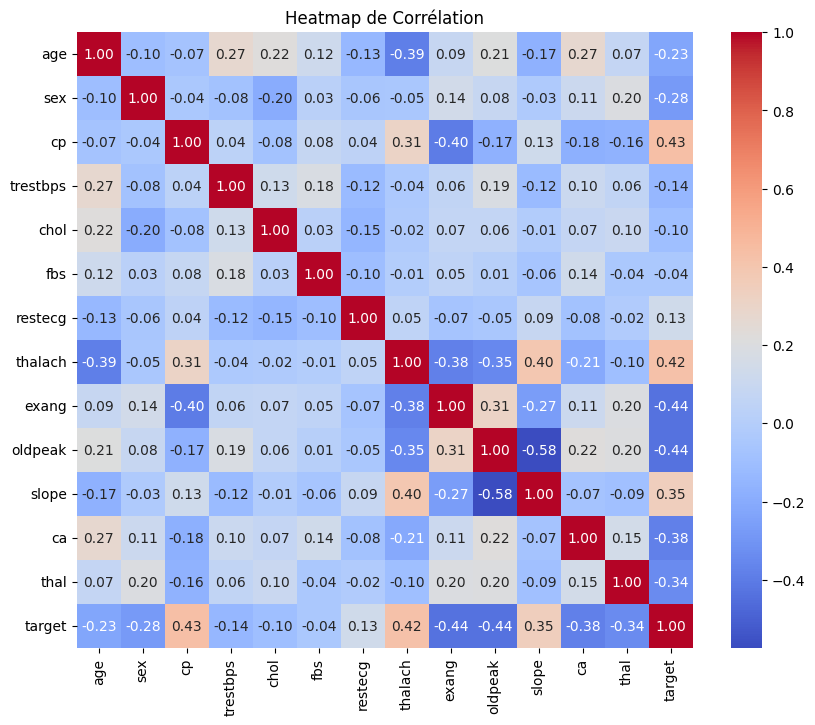

In [5]:
# Visualisation de la heatmap de correlation pour representer les relations entre les variables
corr_matrix = data.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Heatmap de Corrélation")
plt.show()

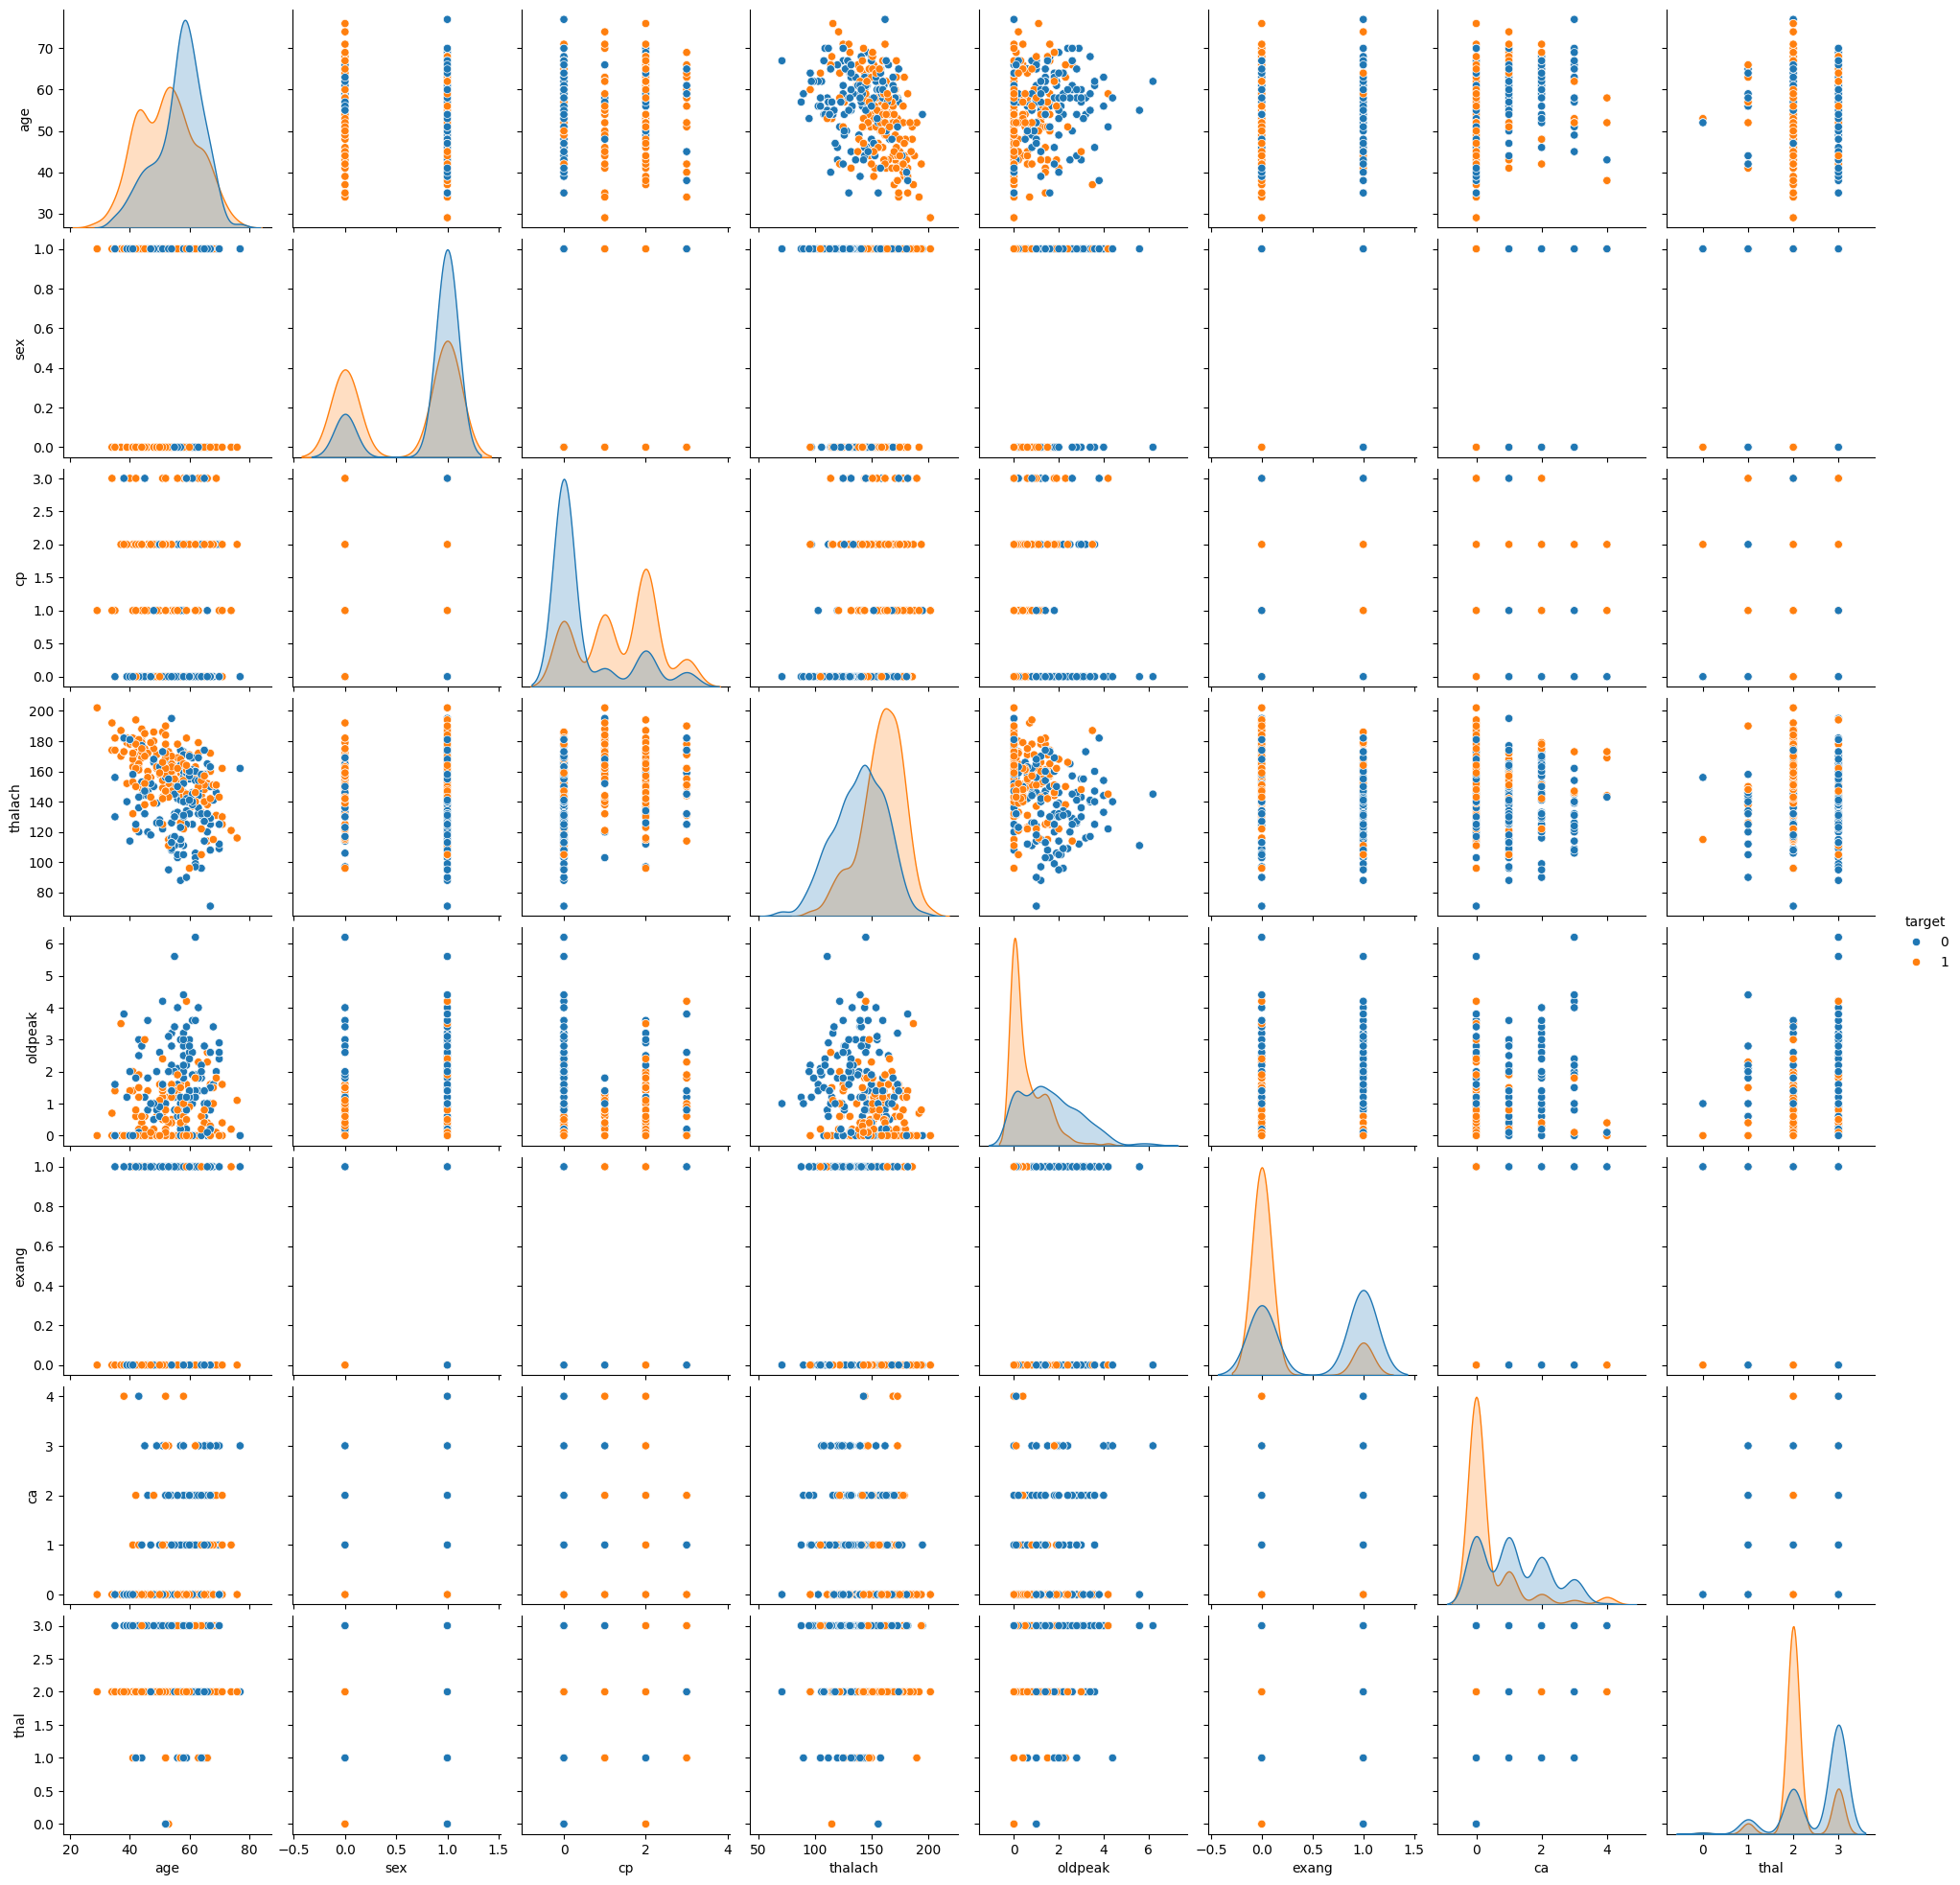

In [6]:
# Visualisation de la relation entre les variables les plus pertinentes pour predire notre target
sns.pairplot(data[["age","sex","cp", "thalach", "oldpeak", "target","exang","ca","thal"]], hue="target")
plt.show()

In [7]:
# Calcul du nombre de valeurs manquantes
missing_values = data.isnull().sum()

# Calcul du pourcentage de valeurs manquantes
missing_percentage = (missing_values / len(data)) * 100

# Création du DataFrame pour afficher les résultats
missing_data = pd.DataFrame({'Nombre de valeurs manquantes': missing_values, 'Pourcentage': missing_percentage})

# Filtrer uniquement les colonnes avec des valeurs manquantes
missing_data = missing_data[missing_data['Nombre de valeurs manquantes'] > 0]

print(missing_data)

Empty DataFrame
Columns: [Nombre de valeurs manquantes, Pourcentage]
Index: []


<ipython-input-25-5c55ccbfe502>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x="age", hue="target", shade=True)
<ipython-input-25-5c55ccbfe502>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x="sex", hue="target", shade=True)
<ipython-input-25-5c55ccbfe502>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x="cp", hue="target", shade=True)
<ipython-input-25-5c55ccbfe502>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x="thalach", hue="target", sh

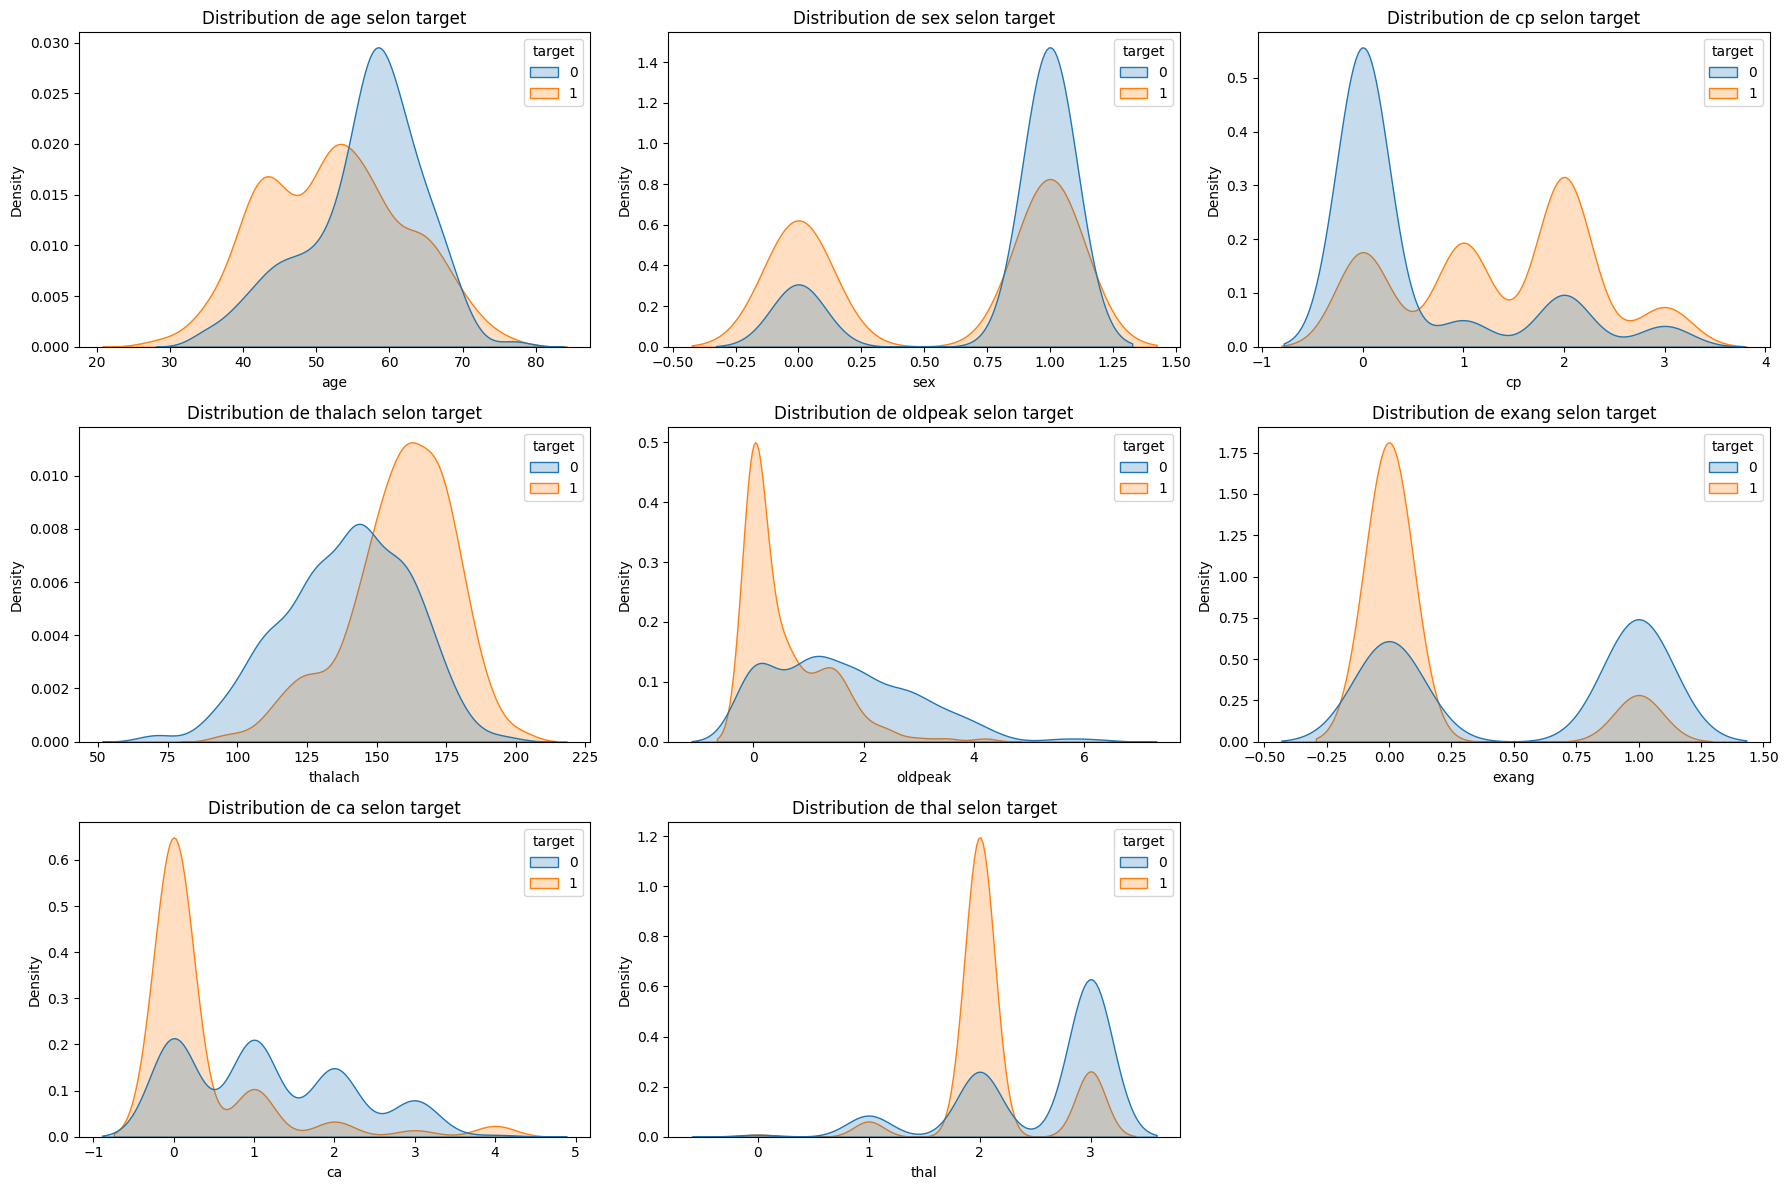

In [25]:
# Exploration des corrélations spécifiques entre les features et la target
plt.figure(figsize=(18, 12))

# Densité pour age
plt.subplot(3, 3, 1)
sns.kdeplot(data=data, x="age", hue="target", shade=True)
plt.title("Distribution de age selon target")

# Densité pour sex
plt.subplot(3, 3, 2)
sns.kdeplot(data=data, x="sex", hue="target", shade=True)
plt.title("Distribution de sex selon target")

# Densité pour cp
plt.subplot(3, 3, 3)
sns.kdeplot(data=data, x="cp", hue="target", shade=True)
plt.title("Distribution de cp selon target")

# Densité pour thalach
plt.subplot(3, 3, 4)
sns.kdeplot(data=data, x="thalach", hue="target", shade=True)
plt.title("Distribution de thalach selon target")

# Densité pour oldpeak
plt.subplot(3, 3, 5)
sns.kdeplot(data=data, x="oldpeak", hue="target", shade=True)
plt.title("Distribution de oldpeak selon target")

# Densité pour exang
plt.subplot(3, 3, 6)
sns.kdeplot(data=data, x="exang", hue="target", shade=True)
plt.title("Distribution de exang selon target")

# Densité pour ca
plt.subplot(3, 3, 7)
sns.kdeplot(data=data, x="ca", hue="target", shade=True)
plt.title("Distribution de ca selon target")

# Densité pour thal
plt.subplot(3, 3, 8)
sns.kdeplot(data=data, x="thal", hue="target", shade=True)
plt.title("Distribution de thal selon target")

plt.tight_layout()
plt.show()


In [9]:
#Creation des donnees test et train et validation
X = data.drop('target', axis=1)# garder que les features
y = data['target']# Definition de la target

# Normalisation des donnees
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Separation des donnes test et train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Reservation de 25% des donnes test pour la valisation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2 du dataset initial


In [10]:
# Fonction qui va nous permettre d'entrainer et evaluer nos modeles
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, is_nn=True, epochs=100, batch_size=32):
    if is_nn:
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, mode='min', restore_best_weights=True)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)
        predictions = model.predict(X_test).round().astype(int).flatten()
        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        return accuracy, f1, recall, history  # Retourne l'historique pour les réseaux de neurones
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        return accuracy, f1, recall, None  # Pas d'historique pour la régression logistique



In [11]:
# Creation des architectures de nos modeles

# Reseau de neuronne leger
model1 = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reseau de neurone plus complexe
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(16, activation='relu'),  
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),  
    Dense(1, activation='sigmoid')  
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Regression logistique
# Création et entraînement du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000)

# Initialisation et entraînement du modèle Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialisation et entraînement du modèle SVM
svm_model = SVC(kernel='rbf', random_state=42)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Entrainement de nos modeles

# Entraîner et évaluer le réseau de neurones léger
acc_model1, f1_model1, recall_model1, history1 = train_and_evaluate_model(model1, X_train, y_train, X_val, y_val, X_test, y_test, is_nn=True)

# Entraîner et évaluer le réseau de neurones complexe
acc_model2, f1_model2, recall_model2, history2 = train_and_evaluate_model(model2, X_train, y_train, X_val, y_val, X_test, y_test, is_nn=True)

# Entraîner et évaluer la régression logistique
acc_logistic, f1_logistic, recall_logistic, history3 = train_and_evaluate_model(logistic_model, X_train, y_train, X_val, y_val, X_test, y_test, is_nn=False)

# Entrainer et evaluer du random forest
acc_rf, f1_rf, recall_rf, _ = train_and_evaluate_model(random_forest_model, X_train, y_train, X_val, y_val, X_test, y_test, is_nn=False)

# Entrainer et evaluer du SVM
acc_svm, f1_svm, recall_svm, _ = train_and_evaluate_model(svm_model, X_train, y_train, X_val, y_val, X_test, y_test, is_nn=False)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Modèle RN léger - Accuracy: 0.9658536585365853 F1-score: 0.9655172413793104 Recall: 0.9514563106796117
Modèle RN complexe - Accuracy: 0.975609756097561 F1-score: 0.9751243781094527 Recall: 0.9514563106796117
Modèle Régression Logistique - Accuracy: 0.7951219512195122 F1-score: 0.8125 Recall: 0.883495145631068
Modèle Random Forest - Accuracy: 0.975609756097561 F1-score: 0.975609756097561 Recall: 0.970873786407767
Modèle SVM - Accuracy: 0.8780487804878049 F1-score: 0.8837209302325582 Recall: 0.9223300970873787



Résumé des performances des modèles :

                  Modèle  Accuracy  F1 Score    Recall
0               RN léger  0.965854  0.965517  0.951456
1            RN complexe  0.975610  0.975124  0.951456
2  Régression Logistique  0.795122  0.812500  0.883495
3          Random Forest  0.975610  0.975610  0.970874
4                    SVM  0.878049  0.883721  0.922330


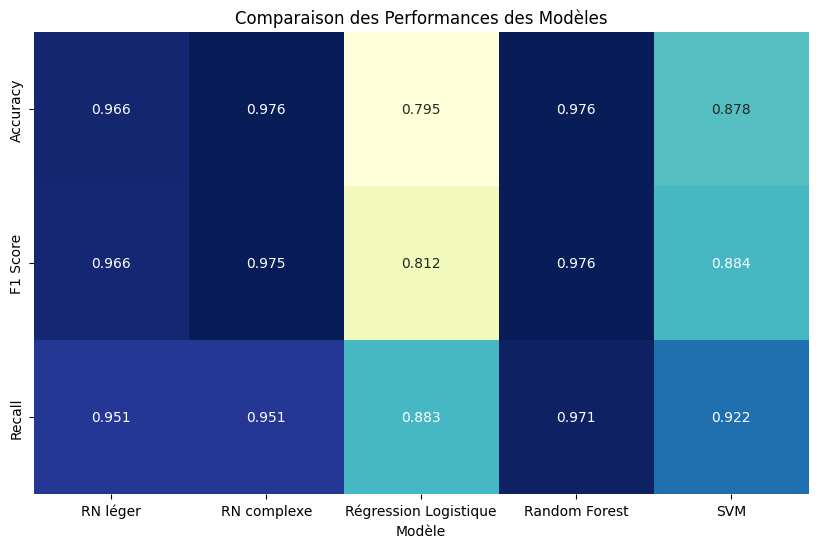

In [27]:
# Résumé des performances de chaque modèle dans un DataFrame
results = pd.DataFrame({
    "Modèle": ["RN léger", "RN complexe", "Régression Logistique", "Random Forest", "SVM"],
    "Accuracy": [acc_model1, acc_model2, acc_logistic, acc_rf, acc_svm],
    "F1 Score": [f1_model1, f1_model2, f1_logistic, f1_rf, f1_svm],
    "Recall": [recall_model1, recall_model2, recall_logistic, recall_rf, recall_svm]
})

# Afficher le tableau des résultats
print("\nRésumé des performances des modèles :\n")
print(results)


plt.figure(figsize=(10, 6))
sns.heatmap(results.set_index("Modèle").T, annot=True, cmap="YlGnBu", fmt=".3f", cbar=False)
plt.title("Comparaison des Performances des Modèles")
plt.show()


In [29]:
# Simulation d'une courbe d'accuracy pour la régression logistique
num_epochs = max(len(history1.history['val_accuracy']), len(history2.history['val_accuracy']))
logistic_accuracy_history = [acc_logistic] * num_epochs  # Liste constante de l'accuracy de régression logistique


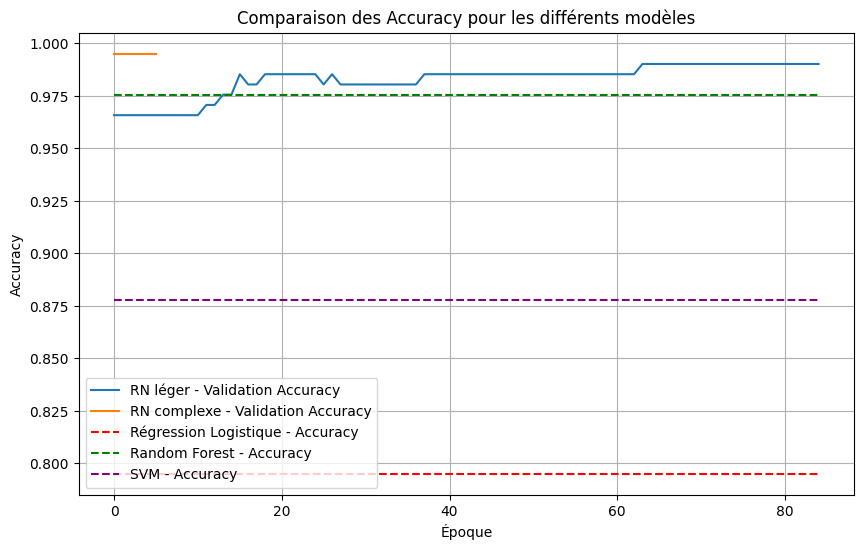

In [30]:
# Simulation de la courbe d'accuracy pour régression logistique, Random Forest et SVM
num_epochs = max(len(history1.history['val_accuracy']), len(history2.history['val_accuracy']))
logistic_accuracy_history = [acc_logistic] * num_epochs  
random_forest_accuracy_history = [acc_rf] * num_epochs   
svm_accuracy_history = [acc_svm] * num_epochs 

# Tracer les courbes d'accuracy
plt.figure(figsize=(10, 6))

# Courbe pour le réseau de neurones léger
plt.plot(history1.history['val_accuracy'], label="RN léger - Validation Accuracy")

# Courbe pour le réseau de neurones complexe
plt.plot(history2.history['val_accuracy'], label="RN complexe - Validation Accuracy")

# Courbe constante pour la régression logistique
plt.plot(logistic_accuracy_history, label="Régression Logistique - Accuracy", linestyle='--', color='red')

# Courbe constante pour Random Forest
plt.plot(random_forest_accuracy_history, label="Random Forest - Accuracy", linestyle='--', color='green')

# Courbe constante pour SVM
plt.plot(svm_accuracy_history, label="SVM - Accuracy", linestyle='--', color='purple')

# Personnalisation du graphique
plt.title("Comparaison des Accuracy pour les différents modèles")
plt.xlabel("Époque")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


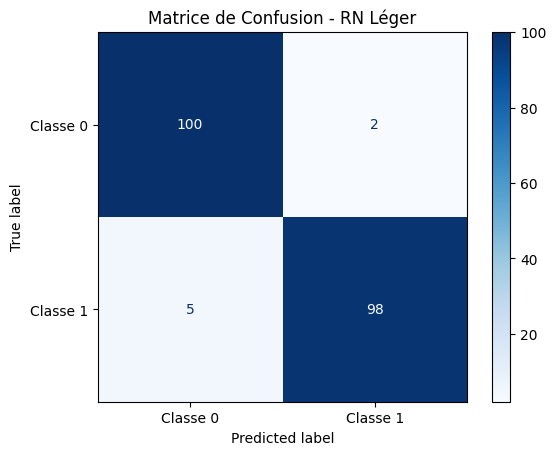

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


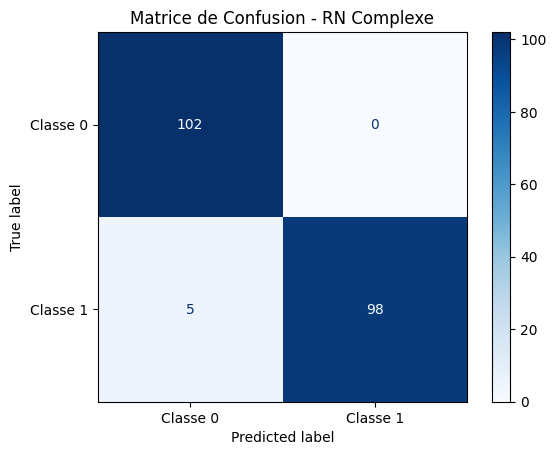

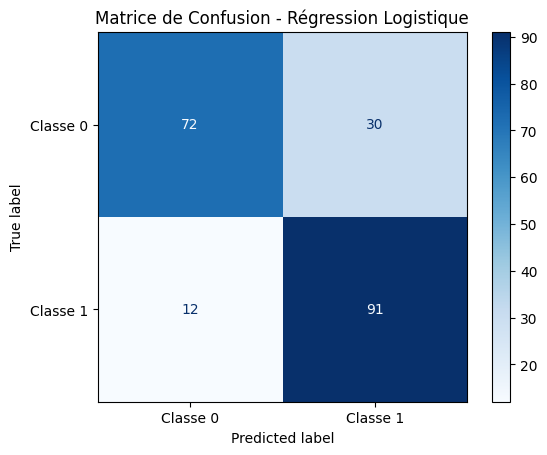

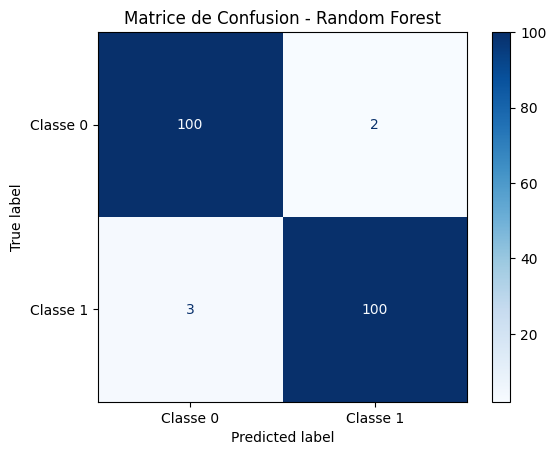

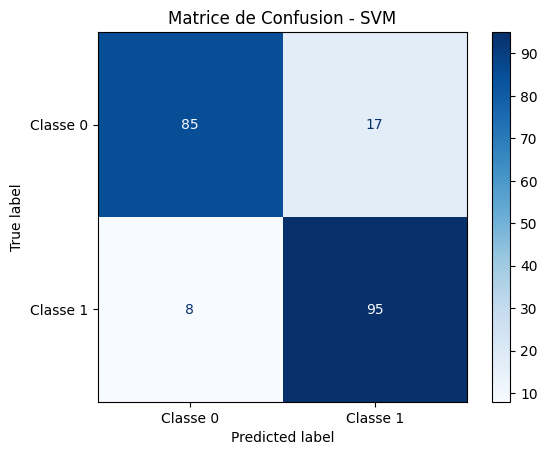

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Fonction pour afficher la matrice de confusion pour un modèle donné
def plot_confusion_matrix(model, X_test, y_test, model_name, is_nn=False):
    if is_nn:  
        y_pred = model.predict(X_test).round().astype(int).flatten()
    else:
        y_pred = model.predict(X_test)

    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matrice de Confusion - {model_name}")
    plt.show()


# Matrice de confusion pour le réseau de neurones léger
plot_confusion_matrix(model1, X_test, y_test, "RN Léger", is_nn=True)

# Matrice de confusion pour le réseau de neurones complexe
plot_confusion_matrix(model2, X_test, y_test, "RN Complexe", is_nn=True)

# Matrice de confusion pour la régression logistique
plot_confusion_matrix(logistic_model, X_test, y_test, "Régression Logistique", is_nn=False)

# Matrice de confusion pour le Random Forest
plot_confusion_matrix(random_forest_model, X_test, y_test, "Random Forest", is_nn=False)

# Matrice de confusion pour le SVM
plot_confusion_matrix(svm_model, X_test, y_test, "SVM", is_nn=False)


In [31]:
# Amelioration du meilleur model "random forest"

# Définir la grille de recherche pour RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialiser le modèle Random Forest
rf = RandomForestClassifier(random_state=42)

# Utiliser RandomizedSearchCV pour trouver les meilleurs hyperparamètres
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,  
    scoring='f1',  
    cv=5, 
    verbose=2,
    random_state=42,
    n_jobs=-1 
)

# Entraîner la recherche d'hyperparamètres
random_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", random_search.best_params_)

# Évaluer le modèle avec les meilleurs hyperparamètres
best_rf = random_search.best_estimator_
accuracy = best_rf.score(X_test, y_test)
print("Accuracy du modèle optimisé :", accuracy)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Accuracy du modèle optimisé : 0.975609756097561
